In [2]:
#anaylze peptide libraries
import pandas as pd
import numpy as np
import os
from pandas import DataFrame
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker

data = pd.read_csv('merged.csv')
data = data.set_index('sequences_translated')
data = data.iloc[1:,:]
data = data.loc[~(data.index.str.contains('_'))]
data = data.loc[~(data.index.str.contains('X'))]
data = data.loc[data.index.str.count('C') == 4]
# data.to_csv('merged_cleaned.csv')

Matplotlib is building the font cache; this may take a moment.


In [3]:
data.sort_values(by=['R6_10%'],ascending=False)

,R2,R3,R5_0%,R5_10%,R5_1%,R6_0%,R6_10%,R6_1%
sequences_translated,,,,,,,,
TCVNIMCCRCP,2065.0,1320.0,83008.0,270062.0,124042.0,79587.0,427328.0,153892.0
ACSSCYRCPWCD,1681.0,769.0,125370.0,192426.0,179011.0,112219.0,170797.0,257464.0
FCENIYCCRCP,2059.0,1047.0,111446.0,165331.0,113155.0,124738.0,113315.0,111922.0
TCYRCCSWPWICG,162.0,56.0,23383.0,48925.0,31026.0,27241.0,106194.0,65866.0
SCYRCSCSIWHCE,291.0,179.0,390529.0,297253.0,475107.0,261534.0,99295.0,458527.0
...,...,...,...,...,...,...,...,...
FCGGFMCDMCYRCP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
SCYRCYCAVPCF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
SCYRCYCPIWRCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
data_fractions = data / data.sum(axis=0)
data_fractions.sort_values(by=['R6_10%'],ascending=False)

,R2,R3,R5_0%,R5_10%,R5_1%,R6_0%,R6_10%,R6_1%
sequences_translated,,,,,,,,
TCVNIMCCRCP,0.001018,0.001621,0.047534,0.150193,0.065793,0.046643,0.280107,7.832662e-02
ACSSCYRCPWCD,0.000829,0.000944,0.071792,0.107017,0.094948,0.065767,0.111955,1.310418e-01
FCENIYCCRCP,0.001015,0.001286,0.063819,0.091948,0.060018,0.073104,0.074276,5.696510e-02
TCYRCCSWPWICG,0.000080,0.000069,0.013390,0.027209,0.016456,0.015965,0.069609,3.352391e-02
SCYRCSCSIWHCE,0.000143,0.000220,0.223634,0.165316,0.251999,0.153274,0.065086,2.333771e-01
...,...,...,...,...,...,...,...,...
FCGGFMCDMCYRCP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.089714e-07
SCYRCYCAVPCF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.089714e-07
SCYRCYCPIWRCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.089714e-07


In [5]:
#generate enrichment scores for adjacent rounds
enrichment_ratios = pd.DataFrame(index=data.index)
enrichment_ratios['R3/R2']=np.where(data['R2']!=0,data['R3']/data['R2'],np.nan)
enrichment_ratios['R6/R5_10%']=np.where(data['R5_10%']!=0,data['R6_10%']/data['R5_10%'],np.nan)
enrichment_ratios['R6/R5_1%']=np.where(data['R5_1%']!=0,data['R6_1%']/data['R5_1%'],np.nan)
enrichment_ratios['R6/R5_0%']=np.where(data['R5_0%']!=0,data['R6_0%']/data['R5_0%'],np.nan)
enrichment_ratios

,R3/R2,R6/R5_10%,R6/R5_1%,R6/R5_0%
sequences_translated,,,,
TCVPEHCSCYRCP,0.102804,0.062053,NaN,0.700565
KCFDCCYRCP,1.135338,0.408589,0.322861,0.170135
YCSLCCYRCP,0.662106,0.289331,0.003257,0.006515
FCLSCCYRCP,0.752552,0.021858,0.003257,0.014423
SCDCCYRCP,0.575222,0.111801,NaN,0.031250
...,...,...,...,...
FCGGFMCDMCYRCP,NaN,NaN,NaN,NaN
SCYRCYCAVPCF,NaN,NaN,NaN,NaN
SCYRCYCPIWRCE,NaN,NaN,NaN,NaN


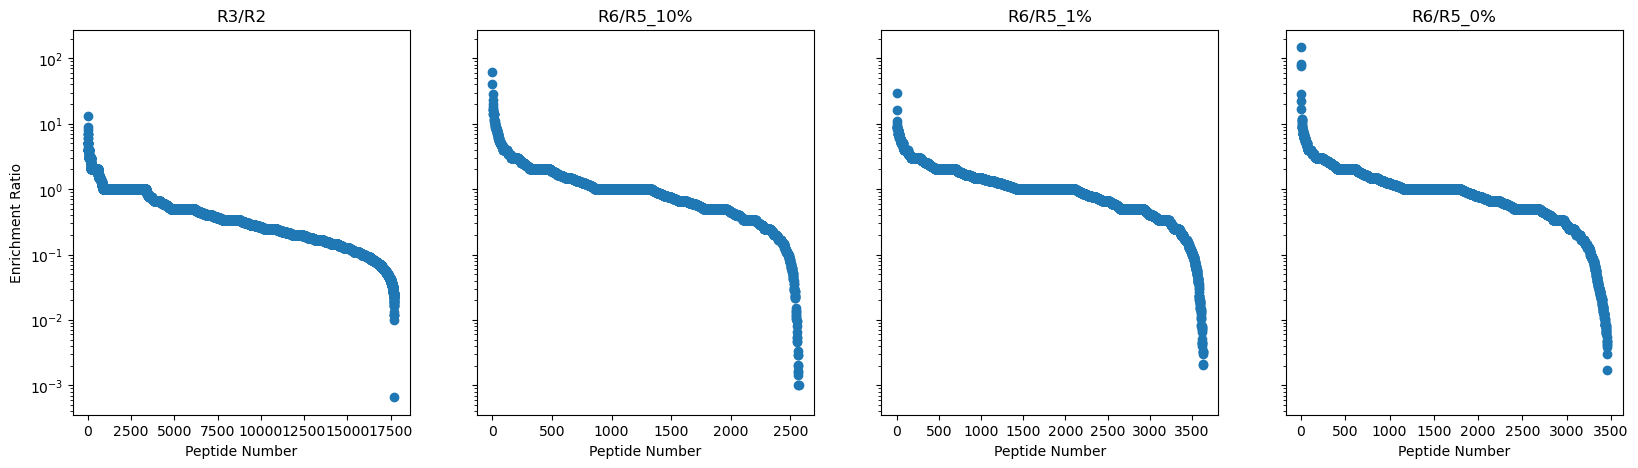

In [6]:
#plot distribution of scores
f, axes = plt.subplots(1, 4, sharey=True,figsize=(20,5))
for i,ax in enumerate(np.ravel(axes)):
    if i==0:
        col='R3/R2'
        ax.set_ylabel('Enrichment Ratio')
    elif i==1:
        col='R6/R5_10%'
    elif i==2:
        col='R6/R5_1%'
    elif i==3:
        col = 'R6/R5_0%'
    plot_data = enrichment_ratios.sort_values(col,ascending=False)[col]
    ax.scatter(range(len(plot_data)),plot_data)
    ax.set_yscale('log')
    ax.set_xlabel('Peptide Number')
    ax.set_title(col)

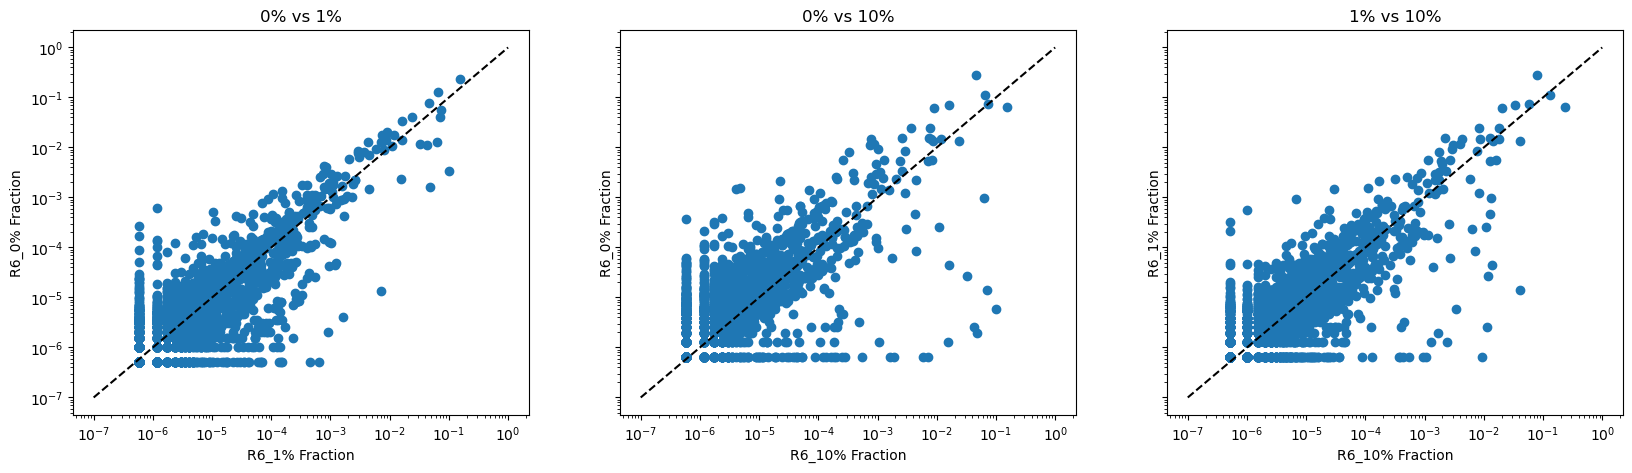

In [7]:
#look at the fractions of the same sequences from different protease selections
f, axes = plt.subplots(1, 3, sharey=True,sharex=True,figsize=(20,5))
for i,ax in enumerate(np.ravel(axes)):
    if i==0:
        title='0% vs 1%'
        col1='R6_0%'
        col2='R6_1%'
    elif i==1:
        title='0% vs 10%'
        col1='R6_0%'
        col2='R6_10%'
    elif i==2:
        title='1% vs 10%'
        col1='R6_1%'
        col2='R6_10%'
    
    plot_data = data_fractions[[col1,col2]]
    ax.set_ylabel(col1+' Fraction')
    ax.set_xlabel(col2+' Fraction')
    ax.set_title(title)
    ax.scatter(plot_data.iloc[:,0],plot_data.iloc[:,1])
    ax.plot([1e-7,1],[1e-7,1],color='black',linestyle='dashed')
    ax.set_yscale('log')
    ax.set_xscale('log')


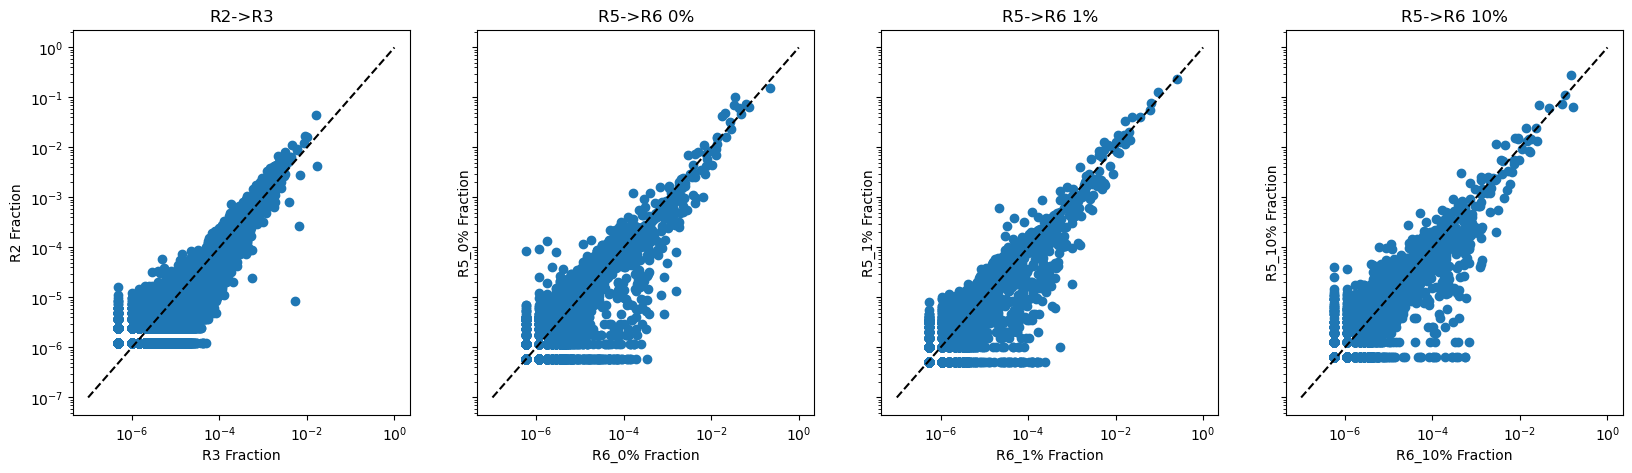

In [8]:
#look at the fraction distribution between rounds
f, axes = plt.subplots(1, 4, sharey=True,sharex=True,figsize=(20,5))
for i,ax in enumerate(np.ravel(axes)):
    if i==0:
        title='R2->R3'
        col1='R2'
        col2='R3'
    elif i==1:
        title='R5->R6 0%'
        col1='R5_0%'
        col2='R6_0%'
    elif i==2:
        title='R5->R6 1%'
        col1='R5_1%'
        col2='R6_1%'
    elif i==3:
        title='R5->R6 10%'
        col1='R5_10%'
        col2='R6_10%'

    
    plot_data = data_fractions[[col1,col2]]
    ax.set_ylabel(col1+' Fraction')
    ax.set_xlabel(col2+' Fraction')
    ax.set_title(title)
    ax.scatter(plot_data.iloc[:,0],plot_data.iloc[:,1])
    ax.plot([1e-7,1],[1e-7,1],color='black',linestyle='dashed')
    ax.set_yscale('log')
    ax.set_xscale('log')


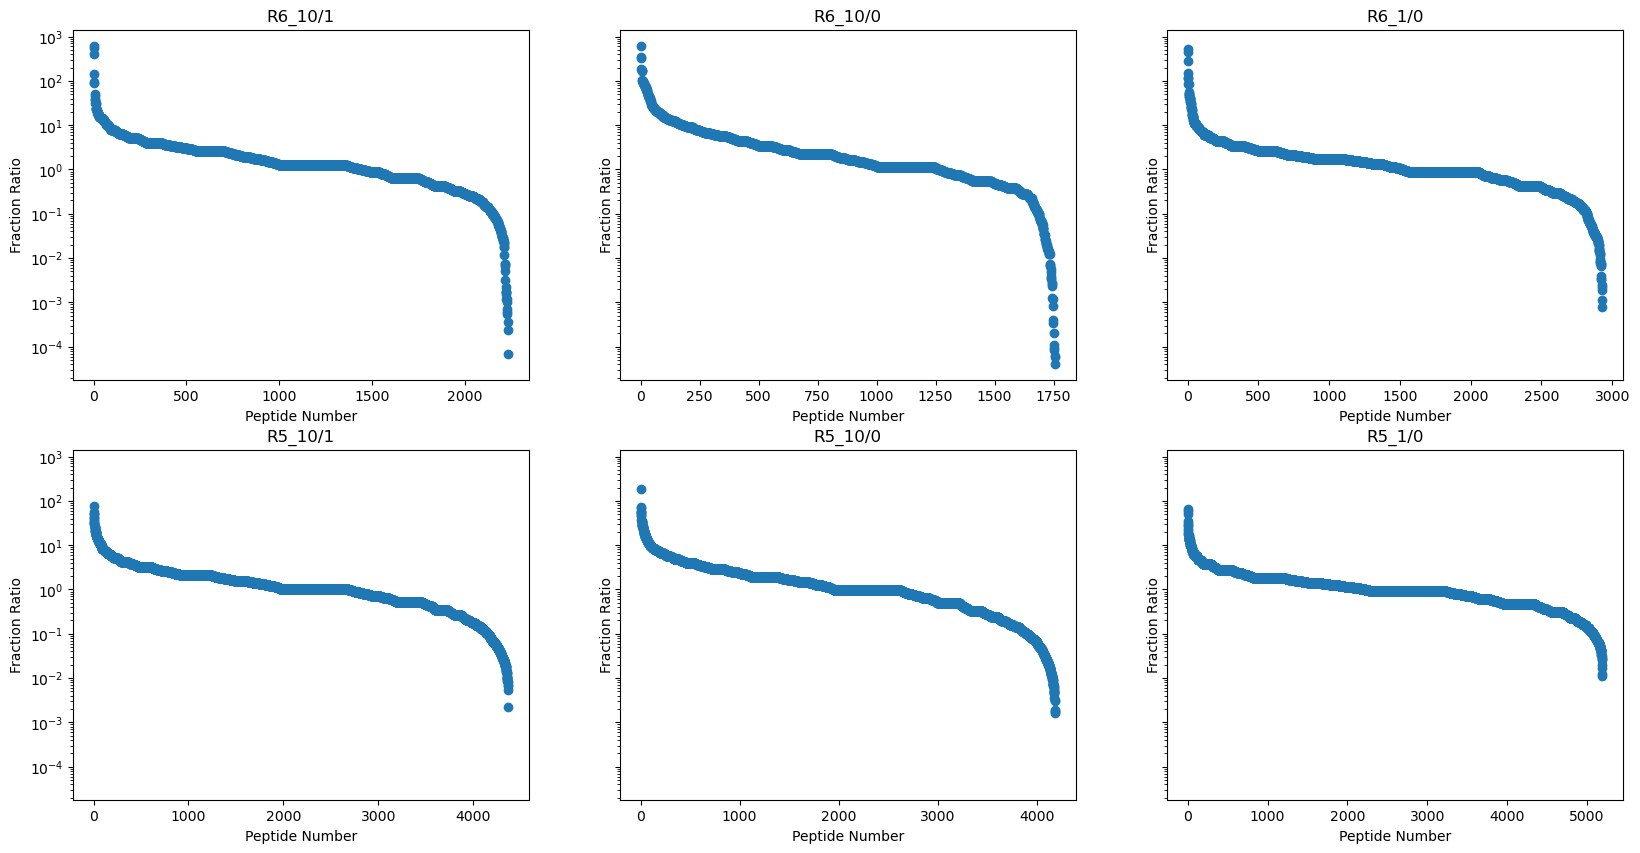

In [9]:
#generate fraction ratios
data_fractions['R6_10/1']=np.where(data_fractions['R6_1%']!=0,data_fractions['R6_10%']/data_fractions['R6_1%'],np.nan)
data_fractions['R6_10/0']=np.where(data_fractions['R6_0%']!=0,data_fractions['R6_10%']/data_fractions['R6_0%'],np.nan)
data_fractions['R6_1/0']=np.where(data_fractions['R6_0%']!=0,data_fractions['R6_1%']/data_fractions['R6_0%'],np.nan)
data_fractions['R5_10/1']=np.where(data_fractions['R5_1%']!=0,data_fractions['R5_10%']/data_fractions['R5_1%'],np.nan)
data_fractions['R5_10/0']=np.where(data_fractions['R5_0%']!=0,data_fractions['R5_10%']/data_fractions['R5_0%'],np.nan)
data_fractions['R5_1/0']=np.where(data_fractions['R5_0%']!=0,data_fractions['R5_1%']/data_fractions['R5_0%'],np.nan)

#plot distribution of fraction ratios
f, axes = plt.subplots(2, 3, sharey=True,figsize=(20,10))
columns=['R6_10/1','R6_10/0','R6_1/0','R5_10/1','R5_10/0','R5_1/0']
for col,ax in zip(columns,np.ravel(axes)):
    ax.set_ylabel('Fraction Ratio')
    ax.set_title(col)
    plot_data = data_fractions.sort_values(col,ascending=False)[col]
    ax.scatter(range(len(plot_data)),plot_data)
    ax.set_yscale('log')
    ax.set_xlabel('Peptide Number')

In [10]:
col = 'R6_10/1'
data_fractions.loc[data_fractions[col] > data_fractions[col].quantile(0.9)].sort_values(col,ascending=False)

,R2,R3,R5_0%,R5_10%,R5_1%,R6_0%,R6_10%,R6_1%,R6_10/1,R6_10/0,R6_1/0,R5_10/1,R5_10/0,R5_1/0
sequences_translated,,,,,,,,,,,,,,
SCFRCSCAVPCN,0.000140,0.000139,0.000111,0.000209,0.000121,1.758177e-06,0.000318,5.089714e-07,624.613539,180.818226,0.289488,1.729149,1.892051,1.094209
SCYRCQCVVCT,0.000885,0.000980,0.000056,0.000166,0.000080,NaN,0.000571,1.017943e-06,560.864322,NaN,NaN,2.076221,2.993655,1.441877
YCSLCCYRCP,0.010016,0.016520,0.000176,0.000615,0.000163,1.172118e-06,0.000210,5.089714e-07,412.116149,178.954121,0.434232,3.777427,3.498799,0.926239
TCYRCTCAQPCA,0.000233,0.000125,0.000283,0.000712,0.000346,2.168418e-05,0.000942,6.616628e-06,142.358391,43.438694,0.305136,2.055304,2.511349,1.221887
YCFSCCYRCP,0.001660,0.004057,0.000066,0.000531,0.000072,1.172118e-06,0.000049,5.089714e-07,95.301860,41.383140,0.434232,7.409586,7.987164,1.077950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCVNIFCCRCP,NaN,NaN,0.000011,0.000044,0.000022,1.289330e-05,0.000151,2.901137e-05,5.196640,11.693025,2.250113,2.045905,3.884742,1.898789
TCTSIFCCRCP,NaN,0.000004,0.000008,0.000035,0.000018,1.289330e-05,0.000082,1.577811e-05,5.192996,6.354905,1.223745,1.942858,4.370335,2.249437
TCFRCTCQVCY,NaN,NaN,0.000001,0.000006,0.000002,NaN,0.000013,2.544857e-06,5.151452,NaN,NaN,3.495088,4.855928,1.389358


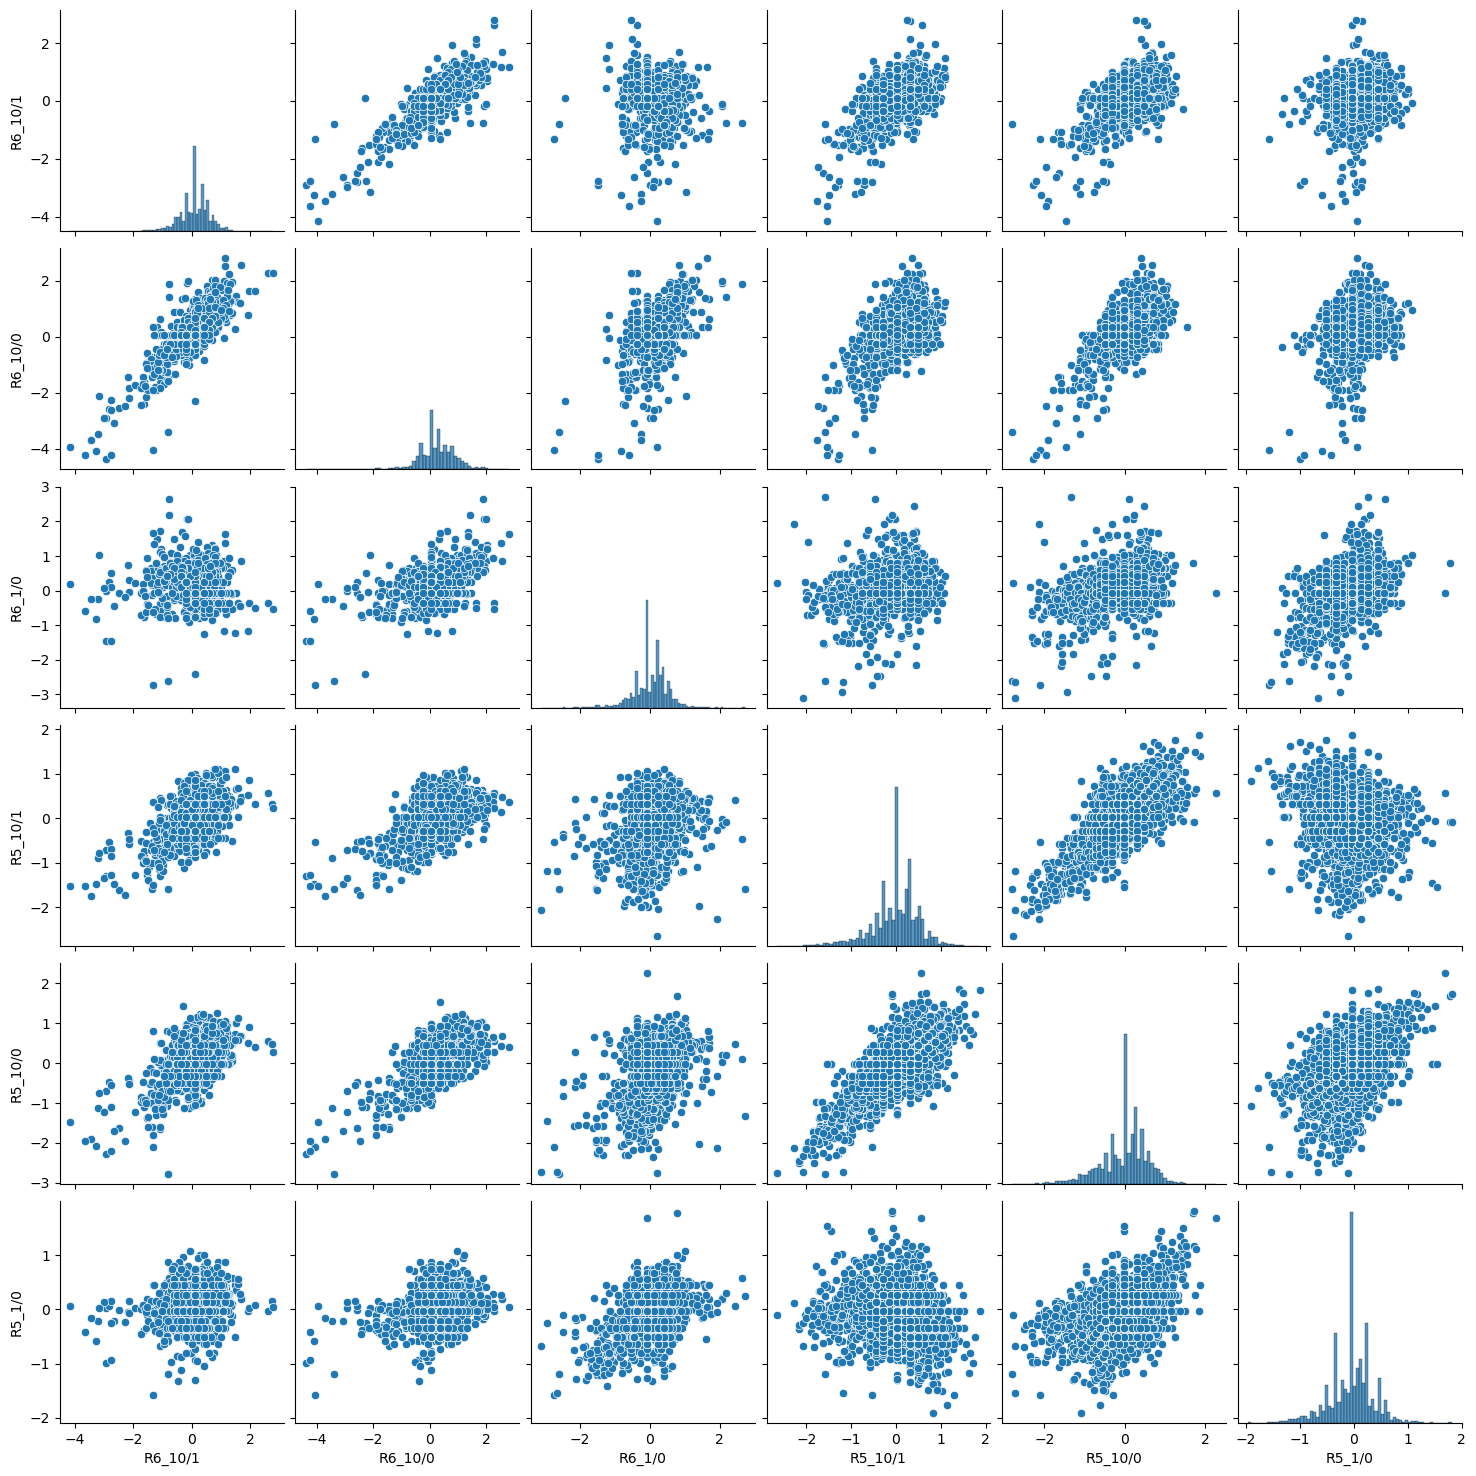

In [11]:
#plot pairwise fraction ratios

columns=['R6_10/1','R6_10/0','R6_1/0','R5_10/1','R5_10/0','R5_1/0']
pp = sns.pairplot(np.log10(data_fractions[columns]))

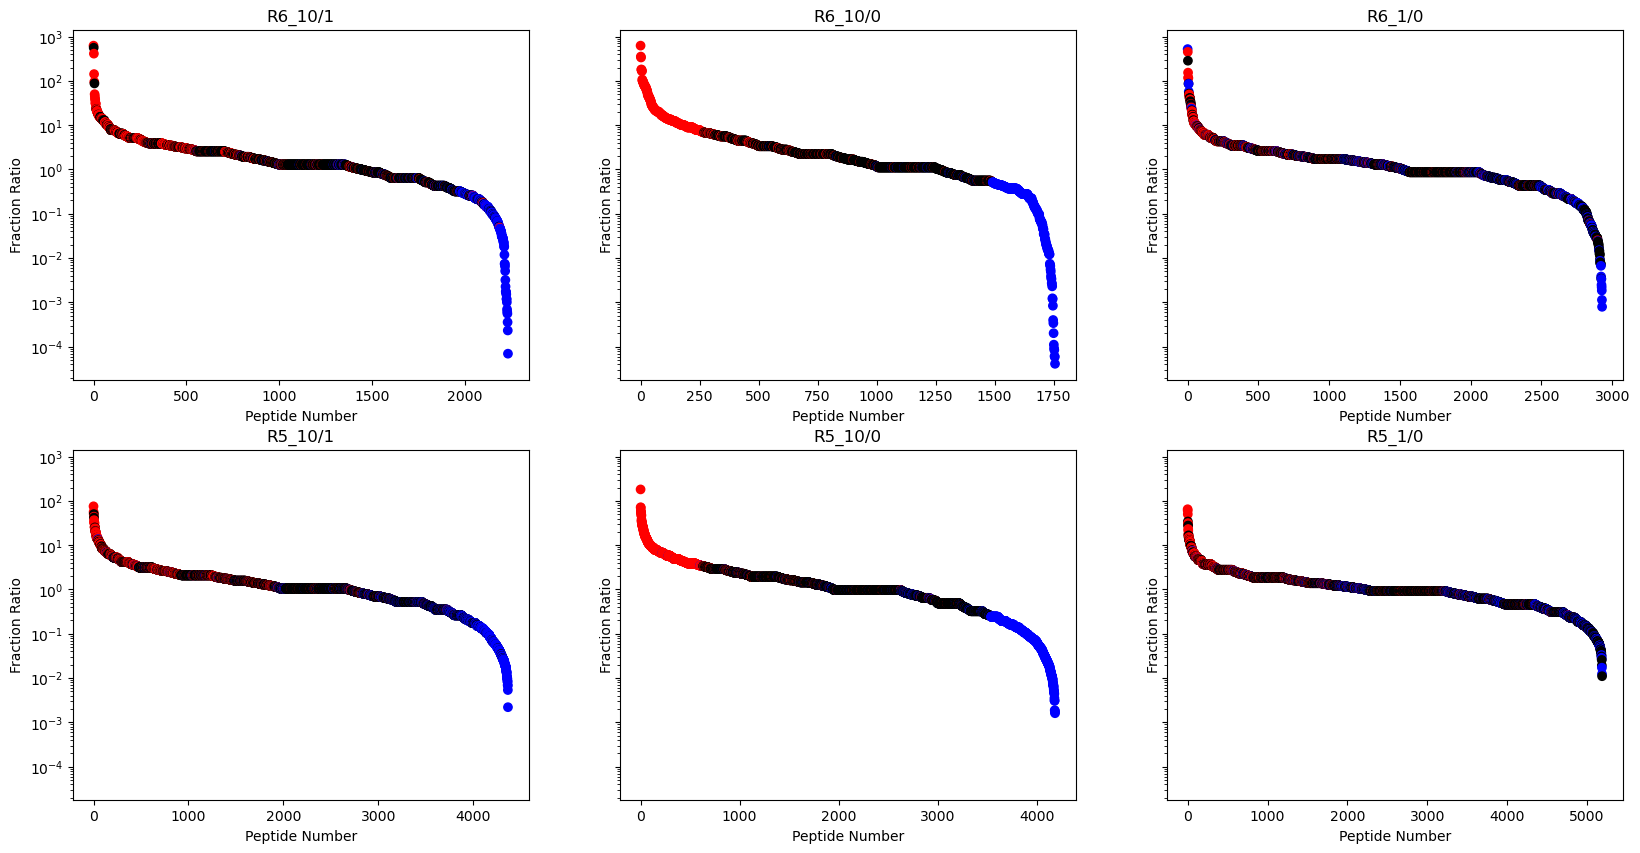

In [12]:
#plot distribution of fraction ratios
f, axes = plt.subplots(2, 3, sharey=True,figsize=(20,10))
columns=['R6_10/1','R6_10/0','R6_1/0','R5_10/1','R5_10/0','R5_1/0']
for col,ax in zip(columns,np.ravel(axes)):
    q = 0.85
    plot_data = data_fractions.sort_values(col,ascending=False)
    colors = np.where((plot_data['R6_10/0'] >= plot_data['R6_10/0'].quantile(q))|(plot_data['R5_10/0'] >= plot_data['R5_10/0'].quantile(q)),'red','black')
    colors = np.where((plot_data['R6_10/0'] <= plot_data['R6_10/0'].quantile(1-q))|(plot_data['R5_10/0'] <= plot_data['R5_10/0'].quantile(1-q)),'blue',colors)
    ax.set_ylabel('Fraction Ratio')
    ax.set_title(col)
    plot_data = plot_data[col]
    ax.scatter(range(len(plot_data)),plot_data,c=colors)
    ax.set_yscale('log')
    ax.set_xlabel('Peptide Number')

In [13]:
#get binary scores based on the top and bottom n% of these distributions
columns=['R6_10/1','R6_10/0','R6_1/0','R5_10/1','R5_10/0','R5_1/0']
for col in columns:
    q=0.15
    print('bottom ' + str(q*100) + '% for ' + col + ': ' +'%.3f' % data_fractions[col].quantile(q))
    print('top ' + str(np.round((1-q),2)*100) + '% for ' + col + ': ' +'%.3f' % data_fractions[col].quantile(1-q))

#positive labels: the peptides that had the highest ratio between the 10% selection and the 0% selection
q=0.85
positive_labels = data_fractions.loc[(data_fractions['R6_10/0'] >= data_fractions['R6_10/0'].quantile(q))|(data_fractions['R5_10/0'] >= data_fractions['R5_10/0'].quantile(q))]

#negative labels: peptides that were completely unenriched from the 3rd round when treated with protease
negative_labels = data_fractions.loc[np.isnan(data_fractions[['R5_0%','R6_0%']]).sum(axis=1) == 0]
# negative_labels = negative_labels.loc[data[['R5_1%','R5_10%','R6_1%','R6_10%']].sum(axis=1) == 0]
negative_labels = negative_labels.loc[(negative_labels['R6_10/0'] <= negative_labels['R6_10/0'].quantile(1-q))|(negative_labels['R5_10/0'] <= negative_labels['R5_10/0'].quantile(1-q))]

bottom 15.0% for R6_10/1: 0.406
top 85.0% for R6_10/1: 3.864
bottom 15.0% for R6_10/0: 0.514
top 85.0% for R6_10/0: 7.045
bottom 15.0% for R6_1/0: 0.434
top 85.0% for R6_1/0: 3.040
bottom 15.0% for R5_10/1: 0.350
top 85.0% for R5_10/1: 2.883
bottom 15.0% for R5_10/0: 0.243
top 85.0% for R5_10/0: 3.399
bottom 15.0% for R5_1/0: 0.397
top 85.0% for R5_1/0: 2.007


In [14]:
positive_labels[['R6_10/0','R5_10/0']]

,R6_10/0,R5_10/0
sequences_translated,,
KCFDCCYRCP,24.938110,9.016751
YCSLCCYRCP,178.954121,3.498799
FCLSCCYRCP,5.965137,3.417826
SCDCCYRCP,20.132339,4.886278
ICTNCRSYCDRCP,1.118463,4.535297
...,...,...
PCYRCQCAVCH,10.066169,NaN
SCENIMCCRCP,11.184633,NaN
ECSNIFCYRCPWCD,8.388474,NaN


In [15]:
negative_labels[['R6_10/0','R5_10/0']]

,R6_10/0,R5_10/0
sequences_translated,,
TCVPEHCSCYRCP,0.234516,2.299021
YCFLCCYRCP,0.372821,3.483385
FCYRCCSWLGCD,0.515732,0.120751
FCFRCLPCEYCP,0.131342,0.239047
GCGFCDRCLPCY,NaN,0.096322
...,...,...
ECSNFFCCRCP,0.372821,2.427964
TCYRCTCYFCN,0.186411,1.942371
LCFRCCVFPWCD,0.279616,0.971186


In [16]:
positive_labels['Stable'] = 1
df = pd.DataFrame(index=positive_labels.index,data=positive_labels['Stable'])
df.to_csv('positive_labels.csv')

/home/marcase/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
negative_labels['Stable'] = 0
df = pd.DataFrame(index=negative_labels.index,data=negative_labels['Stable'])
df.to_csv('negative_labels.csv')

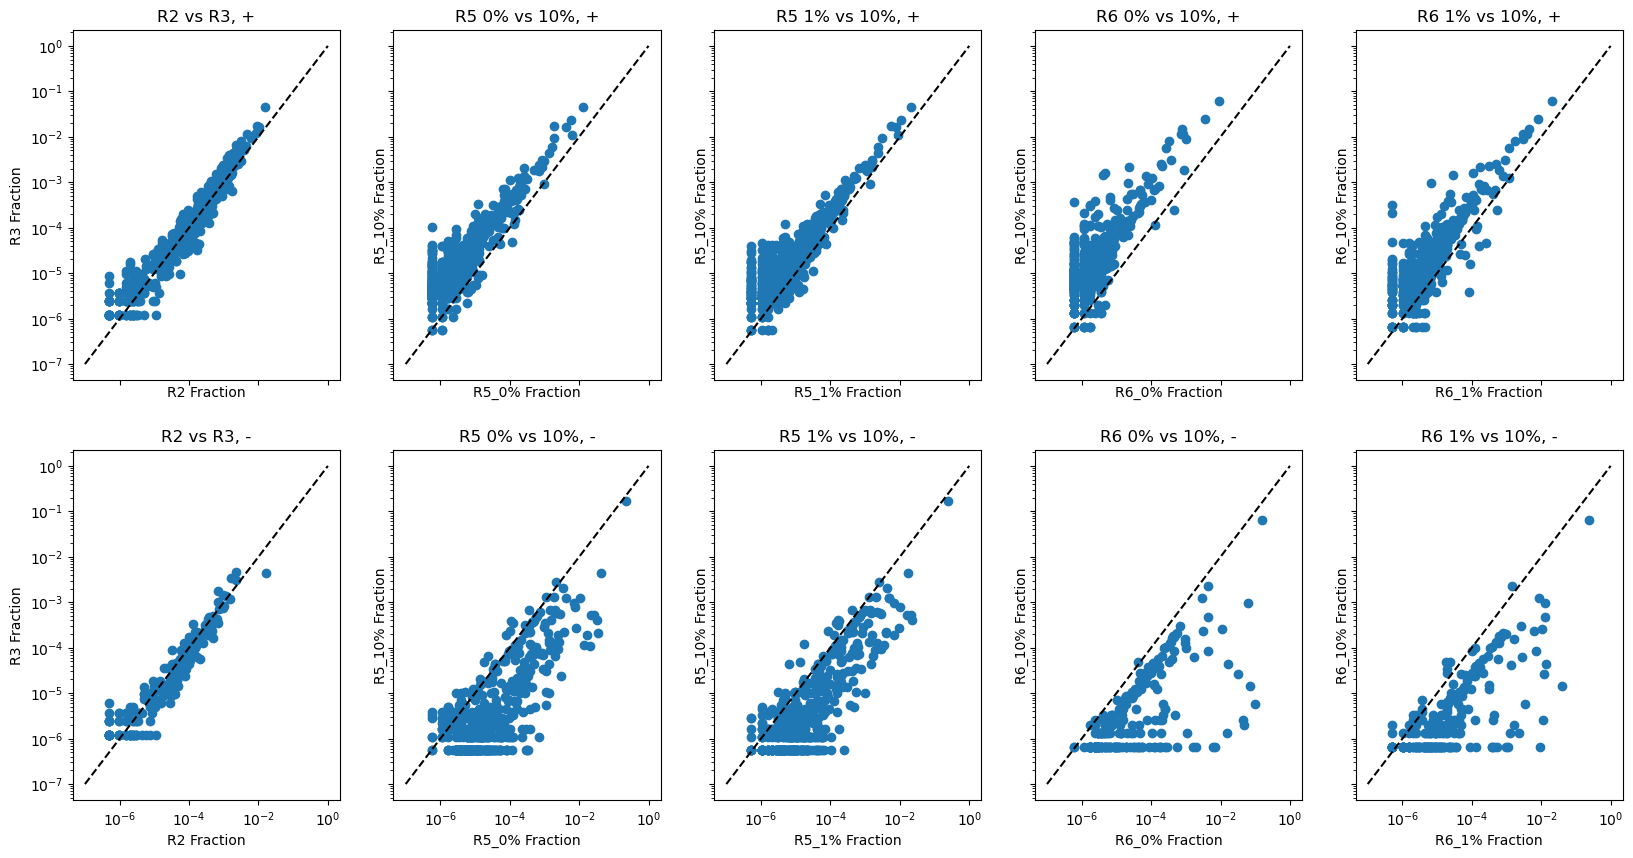

In [18]:
#look at the fraction distribution between rounds
f, axes = plt.subplots(2, 5, sharey=True,sharex=True,figsize=(20,10))
for i,ax in enumerate(np.ravel(axes)):
    if i%5 == 0:
        title='R2 vs R3'
        col1='R2'
        col2='R3'
    elif i%5 == 1:
        title='R5 0% vs 10%'
        col1='R5_0%'
        col2='R5_10%'
    elif i%5 == 2:
        title='R5 1% vs 10%'
        col1='R5_1%'
        col2='R5_10%'
    elif i%5 == 3:
        title='R6 0% vs 10%'
        col1='R6_0%'
        col2='R6_10%'
    elif i%5 == 4:
        title='R6 1% vs 10%'
        col1='R6_1%'
        col2='R6_10%'
    
    if i < 5:
        plot_data = positive_labels[[col1,col2]]
        title = title + ', +'
    else:
        plot_data = negative_labels[[col1,col2]]
        title = title + ', -'
        
    ax.set_ylabel(col2+' Fraction')
    ax.set_xlabel(col1+' Fraction')
    ax.set_title(title)
    ax.scatter(plot_data.iloc[:,0],plot_data.iloc[:,1])
    ax.plot([1e-7,1],[1e-7,1],color='black',linestyle='dashed')
    ax.set_yscale('log')
    ax.set_xscale('log')


/home/marcase/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
/home/marcase/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
/home/marcase/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
/home/marcase/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead


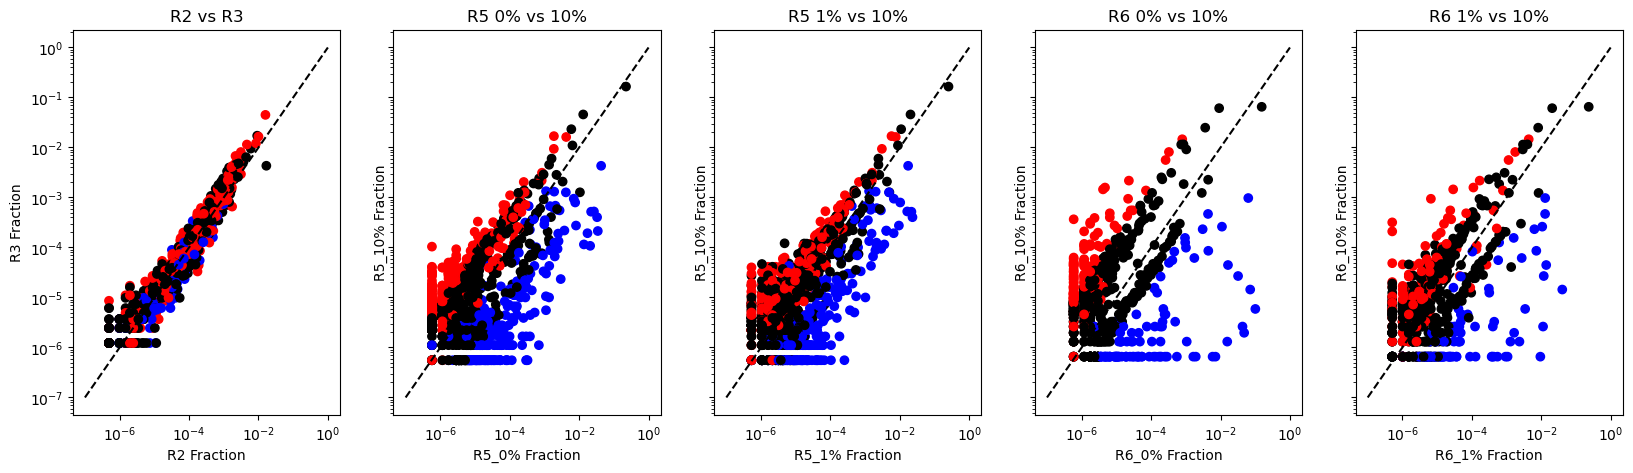

In [19]:
#look at the fraction distribution between rounds
f, axes = plt.subplots(1, 5, sharey=True,sharex=True,figsize=(20,5))
for i,ax in enumerate(np.ravel(axes)):
    if i%5 == 0:
        title='R2 vs R3'
        col1='R2'
        col2='R3'
    elif i%5 == 1:
        title='R5 0% vs 10%'
        col1='R5_0%'
        col2='R5_10%'
    elif i%5 == 2:
        title='R5 1% vs 10%'
        col1='R5_1%'
        col2='R5_10%'
    elif i%5 == 3:
        title='R6 0% vs 10%'
        col1='R6_0%'
        col2='R6_10%'
    elif i%5 == 4:
        title='R6 1% vs 10%'
        col1='R6_1%'
        col2='R6_10%'
    
    plot_data = data_fractions.loc[positive_labels.index | negative_labels.index]
    colors = np.where((plot_data['R6_10/0'] >= plot_data['R6_10/0'].quantile(q))|(plot_data['R5_10/0'] >= plot_data['R5_10/0'].quantile(q)),'red','black')
    colors = np.where((plot_data['R6_10/0'] <= plot_data['R6_10/0'].quantile(1-q))|(plot_data['R5_10/0'] <= plot_data['R5_10/0'].quantile(1-q)),'blue',colors)  
    plot_data = plot_data[[col1,col2]]
    
    ax.set_ylabel(col2+' Fraction')
    ax.set_xlabel(col1+' Fraction')
    ax.set_title(title)
    ax.scatter(plot_data.iloc[:,0],plot_data.iloc[:,1],c=colors)
    ax.plot([1e-7,1],[1e-7,1],color='black',linestyle='dashed')
    ax.set_yscale('log')
    ax.set_xscale('log')


Text(0.5, 1.0, 'Library')

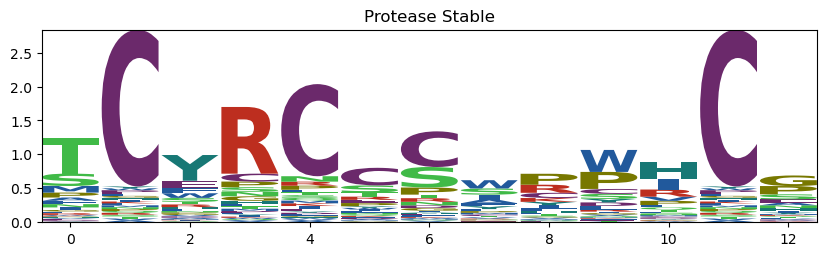

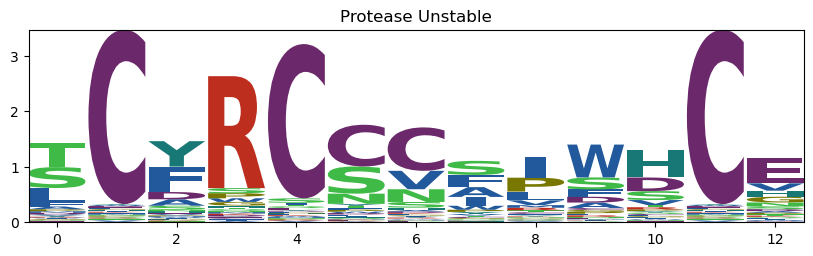

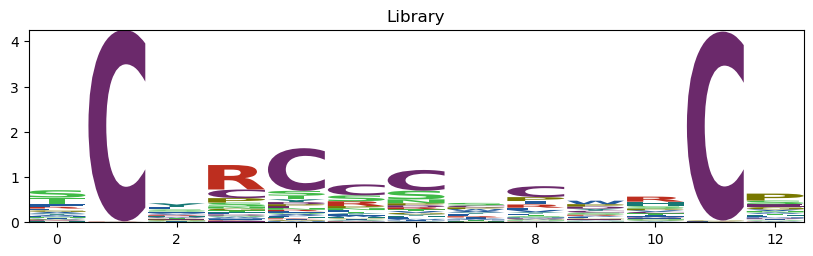

In [46]:
peptide_length = 13

positive_groups = positive_labels.groupby(positive_labels.index.str.len())
positive_matrix = logomaker.alignment_to_matrix(list(positive_labels.iloc[positive_groups.indices[peptide_length]].index),to_type='information')
logo = logomaker.Logo(positive_matrix,color_scheme='NajafabadiEtAl2017')
logo.ax.set_title('Protease Stable')

negative_groups = negative_labels.groupby(negative_labels.index.str.len())
negative_matrix = logomaker.alignment_to_matrix(list(negative_labels.iloc[negative_groups.indices[peptide_length]].index),to_type='information')
logo = logomaker.Logo(negative_matrix,color_scheme='NajafabadiEtAl2017')
logo.ax.set_title('Protease Unstable')

all_groups = data.groupby(data.index.str.len())
all_matrix = logomaker.alignment_to_matrix(list(data.iloc[all_groups.indices[peptide_length]].index),to_type='information')
logo = logomaker.Logo(all_matrix,color_scheme='NajafabadiEtAl2017')
logo.ax.set_title('Library')